In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

In [102]:
df = pd.read_csv("churn_data.csv", index_col='customerID', keep_default_na=True)
df

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Unnamed: 13,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,...,No,NaN,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,...,No,NaN,34,Yes,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,...,No,NaN,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,...,No,NaN,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,...,No internet service,NaN,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,...,Yes,NaN,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,...,Yes,NaN,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 7590-VHVEG to 8361-LTMKD
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   MultipleLines     7042 non-null   object 
 5   InternetService   7042 non-null   object 
 6   OnlineSecurity    7042 non-null   object 
 7   OnlineBackup      7042 non-null   object 
 8   DeviceProtection  7042 non-null   object 
 9   TechSupport       7042 non-null   object 
 10  StreamingTV       7042 non-null   object 
 11  StreamingMovies   7042 non-null   object 
 12  Unnamed: 13       0 non-null      float64
 13  tenure            7042 non-null   int64  
 14  PhoneService      7042 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7042 non-null 

### Unnamed: 13 has no non-null values, so it is useless col and must be removed

In [104]:
df.drop('Unnamed: 13', axis=1, inplace=True)
# As we can see here some objects need the convertion into float
df["TotalCharges"] = df["TotalCharges"].str.replace(' ', '0', regex=True).astype('float')

In [105]:
# Obj columns for encoding
obj_cols = df.columns[df.dtypes == 'O']
obj_cols   

Index(['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [106]:
#look at the types of unique values in columns
for x in df:
    if df[x].dtype =='O':
        print(x, ": ",df[x].unique())

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
PhoneService :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [107]:
# using ordinal encoding
dummied = ce.OrdinalEncoder(cols=obj_cols, return_df=True, drop_invariant=False,
    handle_unknown="value", handle_missing="value",
    mapping=[{'col': 'gender', 'mapping': {'Male':1, 'Female':0}}, # two options and 1 for Male 0 for Female
        {'col': 'Partner', 'mapping': {'Yes':1, 'No':0}}, # two options and 1 for 'yes' 0 for 'no'
        {'col': 'Dependents', 'mapping': {'Yes':1, 'No':0}}, # two options and 1 for 'yes' 0 for 'no'
        {'col': 'MultipleLines', 'mapping': {'No phone service':-1,'Yes':1, 'No':0}}, # two options and 1 for 'yes' 0 for 'no'
        {'col': 'InternetService', 'mapping': {'DSL':0,'Fiber optic':1, 'No':-1}}, # here 'no' has the negative value as it is not an option
        {'col': 'OnlineSecurity', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'OnlineBackup', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'DeviceProtection', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'TechSupport', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'StreamingTV', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'StreamingMovies', 'mapping': {'No internet service':-1,'Yes':1, 'No':0}}, # added -1 for default or nonekind of option
        {'col': 'PhoneService', 'mapping': {'Yes':1, 'No':0}}, # two options and 1 for 'yes' 0 for 'no'
        {'col': 'Contract', 'mapping': {'Month-to-month':0,'One year':1, 'Two year':2}}, #here we put 0,1,2 since all of them are options
        {'col': 'PaperlessBilling', 'mapping': {'Yes':1, 'No':0}}, # two options and 1 for 'yes' 0 for 'no'
        {'col': 'PaymentMethod', 'mapping': {'Electronic check':0,'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}}, #here we put 0,1,2,3 since all of them are options
        {'col': 'Churn', 'mapping': {'Yes':1, 'No':0}},]).fit(df) # fit to dataframe

encoded = dummied.transform(df)
# fit and transform into dataframe
encoded

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,-1,0,0,1,0,0,0,0,1,0,0,1,0,29.85,29.85,0
5575-GNVDE,1,0,0,0,0,0,1,0,1,0,0,0,34,1,1,0,1,56.95,1889.50,0
3668-QPYBK,1,0,0,0,0,0,1,1,0,0,0,0,2,1,0,1,1,53.85,108.15,1
7795-CFOCW,1,0,0,0,-1,0,1,0,1,1,0,0,45,0,1,0,2,42.30,1840.75,0
9237-HQITU,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,72,1,2,1,2,21.15,1419.40,0
6840-RESVB,1,0,1,1,1,0,1,0,1,1,1,1,24,1,1,1,1,84.80,1990.50,0
2234-XADUH,0,0,1,1,1,1,0,1,1,0,1,1,72,1,1,1,3,103.20,7362.90,0


In [108]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 7590-VHVEG to 8361-LTMKD
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   int64  
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   int64  
 3   Dependents        7042 non-null   int64  
 4   MultipleLines     7042 non-null   int64  
 5   InternetService   7042 non-null   int64  
 6   OnlineSecurity    7042 non-null   int64  
 7   OnlineBackup      7042 non-null   int64  
 8   DeviceProtection  7042 non-null   int64  
 9   TechSupport       7042 non-null   int64  
 10  StreamingTV       7042 non-null   int64  
 11  StreamingMovies   7042 non-null   int64  
 12  tenure            7042 non-null   int64  
 13  PhoneService      7042 non-null   int64  
 14  Contract          7042 non-null   int64  
 15  PaperlessBilling  7042 non-null   int64  
 16  PaymentMethod     7042 non-null 

In [109]:
# adding bias column
encoded.insert(0, "bias", 1)
encoded

,bias,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,0,1,0,-1,0,0,1,0,...,0,0,1,0,0,1,0,29.85,29.85,0
5575-GNVDE,1,1,0,0,0,0,0,1,0,1,...,0,0,34,1,1,0,1,56.95,1889.50,0
3668-QPYBK,1,1,0,0,0,0,0,1,1,0,...,0,0,2,1,0,1,1,53.85,108.15,1
7795-CFOCW,1,1,0,0,0,-1,0,1,0,1,...,0,0,45,0,1,0,2,42.30,1840.75,0
9237-HQITU,1,0,0,0,0,0,1,0,0,0,...,0,0,2,1,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,0,0,0,0,0,-1,-1,-1,-1,...,-1,-1,72,1,2,1,2,21.15,1419.40,0
6840-RESVB,1,1,0,1,1,1,0,1,0,1,...,1,1,24,1,1,1,1,84.80,1990.50,0
2234-XADUH,1,0,0,1,1,1,1,0,1,1,...,1,1,72,1,1,1,3,103.20,7362.90,0


### Oversampling (optional as it did not help at all)

In [110]:
#minor_class = encoded[encoded["Churn"] == 1].sample(frac=1)   # to shuffle df
#minor_class

In [111]:
encoded["Churn"].value_counts(normalize=True)   # class 1 is under-represented

0    0.734592
1    0.265408
Name: Churn, dtype: float64

In [112]:
#encoded = encoded.append(minor_class).sample(frac=1)   # to shuffle df
#encoded

In [113]:
#encoded["Churn"].value_counts(normalize=True) 

### Train/test split

In [114]:
# split into train/test
def split(data, train_frac, test_frac, validation_frac=0):
    rows = data.shape[0]
    if validation_frac:
        return (data.iloc[:int(rows*train_frac), :],
                data.iloc[int(rows*train_frac):int(rows*test_frac), :],
                data.iloc[int(rows*test_frac):int(rows*validation_frac), :])
    else:
        return (data.iloc[:int(rows*train_frac), :],
                data.iloc[int(rows*train_frac):, :])
    

In [115]:
train, test = split(encoded, 0.8, 0.2, 0)
print(train.shape)
print(test.shape)
print(train.shape[0]+test.shape[0])

(5633, 21)
(1409, 21)
7042


### Pay attention to the ration for example gender column : ration is sustainable accross whole dataset / train/test/valid and equal to 50%

In [116]:
encoded.describe()

,bias,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7042.0,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,...,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000
mean,1.0,0.504686,0.162170,0.483101,0.299631,0.325050,0.222806,0.069867,0.128231,0.127095,...,0.167566,0.171116,32.366373,0.903153,0.690287,0.592161,1.315535,64.755886,2279.086083,0.265408
std,0.0,0.500014,0.368633,0.499750,0.458129,0.642764,0.778877,0.706014,0.738420,0.737847,...,0.756947,0.758496,24.557955,0.295771,0.833668,0.491468,1.148960,30.088238,2266.302524,0.441581
min,1.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.075000,0.000000
75%,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3783.600000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [117]:
train.describe()

,bias,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5633.0,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,...,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000,5633.000000
mean,1.0,0.504527,0.160483,0.482514,0.297177,0.332150,0.222794,0.070833,0.126931,0.128173,...,0.167939,0.170247,32.301260,0.907509,0.685780,0.591869,1.320966,64.874321,2278.602592,0.264158
std,0.0,0.500024,0.367086,0.499738,0.457056,0.637871,0.779645,0.707450,0.738578,0.739205,...,0.757905,0.758912,24.588285,0.289743,0.832557,0.491531,1.148561,30.097896,2268.438761,0.440923
min,1.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,35.650000,390.400000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1398.250000,0.000000
75%,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,2.000000,89.900000,3770.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [118]:
test.describe()

,bias,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1409.0,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,...,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,1.0,0.505323,0.168914,0.485451,0.309439,0.296664,0.222853,0.066004,0.133428,0.122782,...,0.166075,0.174592,32.626686,0.885735,0.708304,0.593329,1.293825,64.282399,2281.019021,0.270405
std,0.0,0.500149,0.374809,0.499966,0.462427,0.661435,0.776073,0.700478,0.738027,0.732639,...,0.753372,0.757093,24.443285,0.318246,0.838150,0.491387,1.150703,30.055605,2258.544032,0.444327
min,1.0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.550000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,35.200000,413.650000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.000000,1.000000,0.000000,1.000000,1.000000,70.100000,1375.600000,0.000000
75%,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,2.000000,89.600000,3827.900000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,3.000000,118.200000,8670.100000,1.000000


In [119]:
n = encoded.shape[1]
x_train = train.iloc[:, :n-1].to_numpy()
x_test = test.iloc[:, :n-1].to_numpy()
m = x_train.shape[0]
y_train = train.iloc[:, n-1].to_numpy().reshape([m, 1])
y_test = test.iloc[:, n-1].to_numpy().reshape([x_test.shape[0], 1])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5633, 20)
(5633, 1)
(1409, 20)
(1409, 1)


In [120]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def h(W, X):
    return sigmoid(X.dot(W.T))

def cost(W, X, Y):
    return -np.sum( Y*np.log1p(h(W, X)) + (1-Y)*np.log1p(1-h(W, X)) )/X.shape[0]

def confusion_matrix(y_true, y_pred):
    true_pos = 0
    false_pos = 0
    false_neg = 0
    true_neg = 0
    for index in range(0, y_true.shape[0]):
        if y_pred[index][0]:
            if y_true[index][0]:
                true_pos = true_pos + 1
            else:
                false_pos = false_pos + 1
        else:
            if y_true[index][0]:
                false_neg = false_neg + 1
            else:
                true_neg = true_neg + 1
            
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    return precision, recall, true_pos, true_neg, false_pos, false_neg


<ipython-input-120-99ee879eee37>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Epoch 0: train cost = -0.5090570492134571; train accuracy = 73.4244629859755
            Test cost = -0.5090570492134571; test accuracy = 72.81760113555713
            Train : precision=0.37540156034878386; recall=0.5497311827956989; f1 = 0.44614125988546494

Epoch 2: train cost = -0.509086655998351; train accuracy = 73.4244629859755
            Test cost = -0.509086655998351; test accuracy = 72.81760113555713
            Train : precision=0.37562301767104667; recall=0.5571236559139785; f1 = 0.4487144790257104

Epoch 4: train cost = -0.5091081552890117; train accuracy = 73.4244629859755
            Test cost = -0.5091081552890117; test accuracy = 72.81760113555713
            Train : precision=0.3740526081141329; recall=0.5638440860215054; f1 = 0.44974537657464486

Epoch 6: train cost = -0.5091326425381716; train accuracy = 73.44221551571098
            Test cost = -0.5091326425381716; test accuracy = 72.88857345635202
            Train : precision=0.3706631532718489; recall=0.56720430

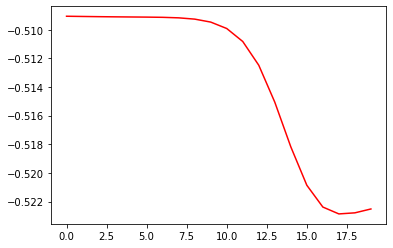

In [121]:
epochs = 20
alpha = 5*10**(-9)
#lambd = 10**(3)
np.random.seed(2)
W = 2*np.random.random([1, n-1]) - 1
train_error = []
test_error = []
for epoch in range(0, epochs):
    J_train = cost(W, x_train, y_train)
    precision,recall,true_pos,true_neg,false_pos,false_neg=confusion_matrix(y_true=y_train, y_pred=h(W, x_train))
    train_error.append(J_train)
    J_test = cost(W, x_test, y_test)
    test_error.append(J_test)
    if epoch%2 == 0 or epoch == epochs-1:
        pred = h(W, x_train) >= 0.5
        pred = pred + 0
        train_accuracy = 100*np.sum(y_train == pred)/m
        print(f"Epoch {epoch}: train cost = {J_train}; train accuracy = {train_accuracy}")
        pred = h(W, x_test) >= 0.5
        pred = pred + 0
        test_accuracy = 100*np.sum(y_test == pred)/x_test.shape[0]
        print(f"            Test cost = {J_train}; test accuracy = {test_accuracy}")
        print(f"            Train : precision={precision}; recall={recall};" + 
              f" f1 = {2*precision*recall/(precision+recall)}\n")
    # update
    W = W - alpha*(h(W, x_train) - y_train).T.dot(x_train)   # no reg
    #W = (1-alpha*lambd/m)*W - alpha*(h(W, x_train) - y_train).T.dot(x_train)  # l2 regularization
    
plt.plot(range(0, epochs), train_error, 'r')
plt.show()

In [122]:
precision,recall,true_pos,true_neg,false_pos,false_neg = confusion_matrix(y_true=y_train, y_pred=h(W, x_train))
print(f"Precision = {precision}; recall = {recall}; f1 = {2*precision*recall/(precision+recall)}")
print(f"Tp = {true_pos}; Tn = {true_neg}; Fp = {false_pos}; Fn = {false_neg}")

Precision = 0.3606811145510836; recall = 0.6263440860215054; f1 = 0.4577603143418467
Tp = 932; Tn = 2493; Fp = 1652; Fn = 556


<ipython-input-120-99ee879eee37>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


### Confusion Matrix

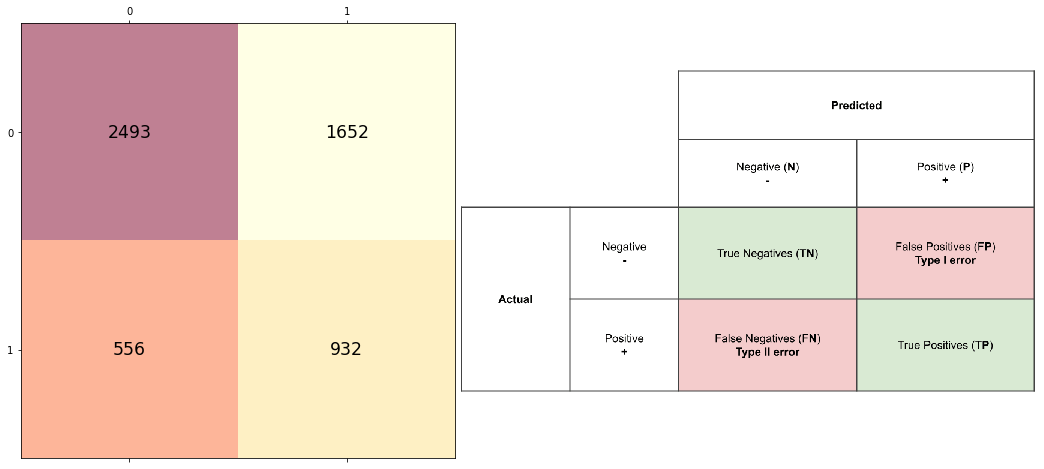

In [123]:
mat_con = np.array([
    [true_neg, false_neg],
    [false_pos, true_pos],
])
fig, px = plt.subplots(figsize=(8, 8))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')
   
img = plt.imread('confusion_matrix.png')
newax = fig.add_axes([0.9,0.2,1,0.6], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
plt.show()

## The same but using sklearn (results better due to usage of advanced techniques (lbfgs))

In [124]:
# skleran 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [125]:
n = encoded.shape[1]
x_train = train.iloc[:, :n-1].to_numpy()
x_test = test.iloc[:, :n-1].to_numpy()
m = x_train.shape[0]
y_train = train.iloc[:, n-1].to_numpy()
y_test = test.iloc[:, n-1].to_numpy()

model = LogisticRegression(random_state=0, max_iter=500).fit(x_train, y_train)

In [126]:
preds = model.predict(x_test)
C = -np.sum( y_test*np.log1p(preds) + (1-y_test)*np.log1p(1-preds) )/x_test.shape[0]
C

-0.5544193559198427

In [127]:
model.score(x_test, y_test)

0.7998580553584103

In [128]:
mat_con = confusion_matrix(y_test, preds)
mat_con

array([[929,  99],
       [183, 198]])

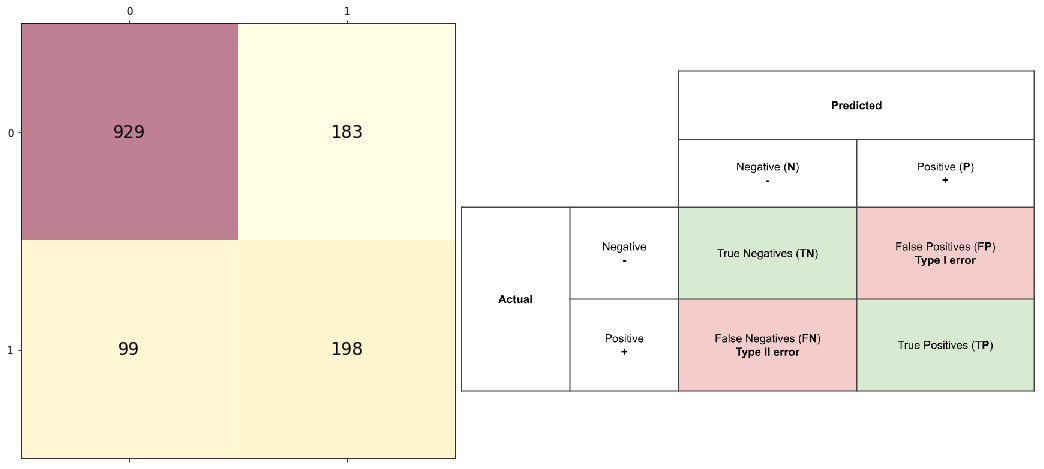

In [129]:
fig, px = plt.subplots(figsize=(8, 8))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')
   
img = plt.imread('confusion_matrix.png')
newax = fig.add_axes([0.9,0.2,1,0.6], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
plt.show()

In [130]:
preds = model.predict(x_train)
C = -np.sum( y_train*np.log1p(preds) + (1-y_train)*np.log1p(1-preds) )/x_train.shape[0]
C

-0.557913956445729

In [131]:
model.score(x_train, y_train)

0.8048996982069945

In [132]:
mat_con = confusion_matrix(y_train, preds)
mat_con

array([[3737,  408],
       [ 691,  797]])

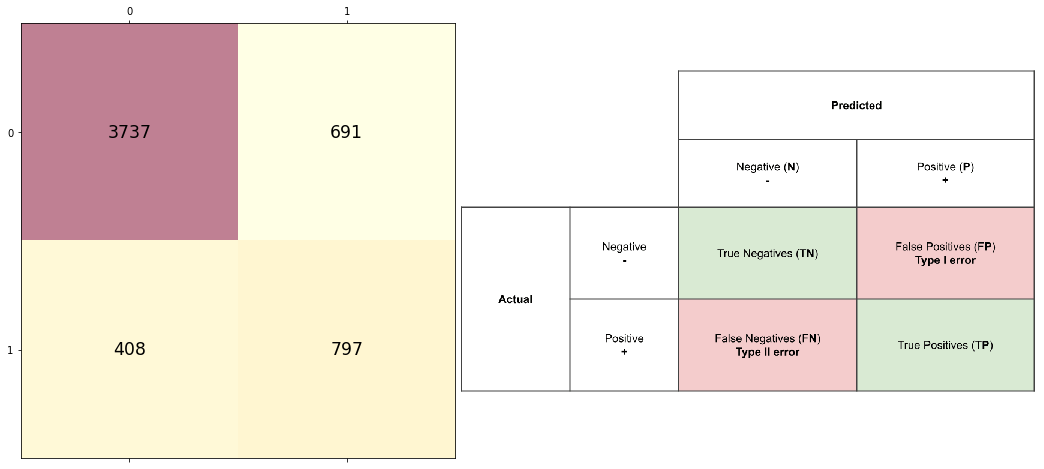

In [133]:
fig, px = plt.subplots(figsize=(8, 8))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')
   
img = plt.imread('confusion_matrix.png')
newax = fig.add_axes([0.9,0.2,1,0.6], anchor='NE', zorder=1)
newax.imshow(img)
newax.axis('off')
plt.show()